<H1>CARACTERIZACIÓN DE REDES Y TOPOLOGÍAS BIOLÓGICAS</H1>

<H2>Exercise 2, Random Graphs, Regular Graphs and Small World Networks</H2>

<H3>Tadhg Cuddihy</H3>

<H3>Mónica Ruíz Rosario</H3>

In [2]:
import networkx as nx
import numpy as np
import scipy.interpolate as interp
import matplotlib.pyplot as plt
import random
%matplotlib inline

<H3>Section 1: Study the properties of a random graph</H3>

<H4> a. Implement a Python routine L_C_Random that returns the average value of the
coefficients C (clustering coefficient ) and L (characteristic path) and the order of the
largest connected component of a set of n_graph random graphs of n nodes and
probability p </H4> 

The format of the function must be
[ l, c , tam ] = L_C_Aleatorio ( n_graph, n, p )

In [2]:
def L_C_Random(n_graph, n, p):
    
    C = []
    L = []
    tam = []

    #Make random graphs
    for i in range(n_graph):
        random = nx.gnp_random_graph(n, p, seed=None, directed=False)

        #Clustering coefficient
        clus = nx.average_clustering(random)
        C.append(clus)

        #characteristic path
        #if the graph is connected, calculate the shortest path
        try:
            path = nx.average_shortest_path_length(random)
            L.append(path)
            
        #if graph is disconnected, path is length of largest subgraph
        except:
            path = nx.connected_component_subgraphs(random)
            subgraph = []
            for component in path:
                L_sub = nx.average_shortest_path_length(component)
                subgraph.append(L_sub)
            L.append(max(subgraph))
                
        #order
        order = max(nx.connected_components(random), key=len)
        tam.append(max(order))
    
    #[L, C, tam]
    return(sum(L)/len(L), sum(C)/len(C), sum(tam)/len(tam))

In [3]:
#example using the function
L_C_Random(10, 100, 0.01)

(4.333504439797062, 0.007166666666666667, 95.9)

<h4>b. Use the previous routine, to plot the behavior of L, C and the order of the largest connected component for different values of the probability p and a fixed number of nodes.</h4>

Use n = 800 , n_graph = 100 and the following values of p:

[ 0.0, 0.0001, 0.0003, 0.0006, 0.001, 0.003, 0.006, 0.01, 0.03, 0.06, 0.1, 0.3, 0.6, 1]

<h4>Can occur what, in Some cases, L take the value infinite (assign them the same value as the maximum) What happens in the graph for what L take that value?</h4>

The graph is disconnected when the value of L is infinite. In this case, the function takes the path of the largest connected subgraph

<h4>Draw a graph that describes the behaviour of these three parameters as a function of p.</h4>

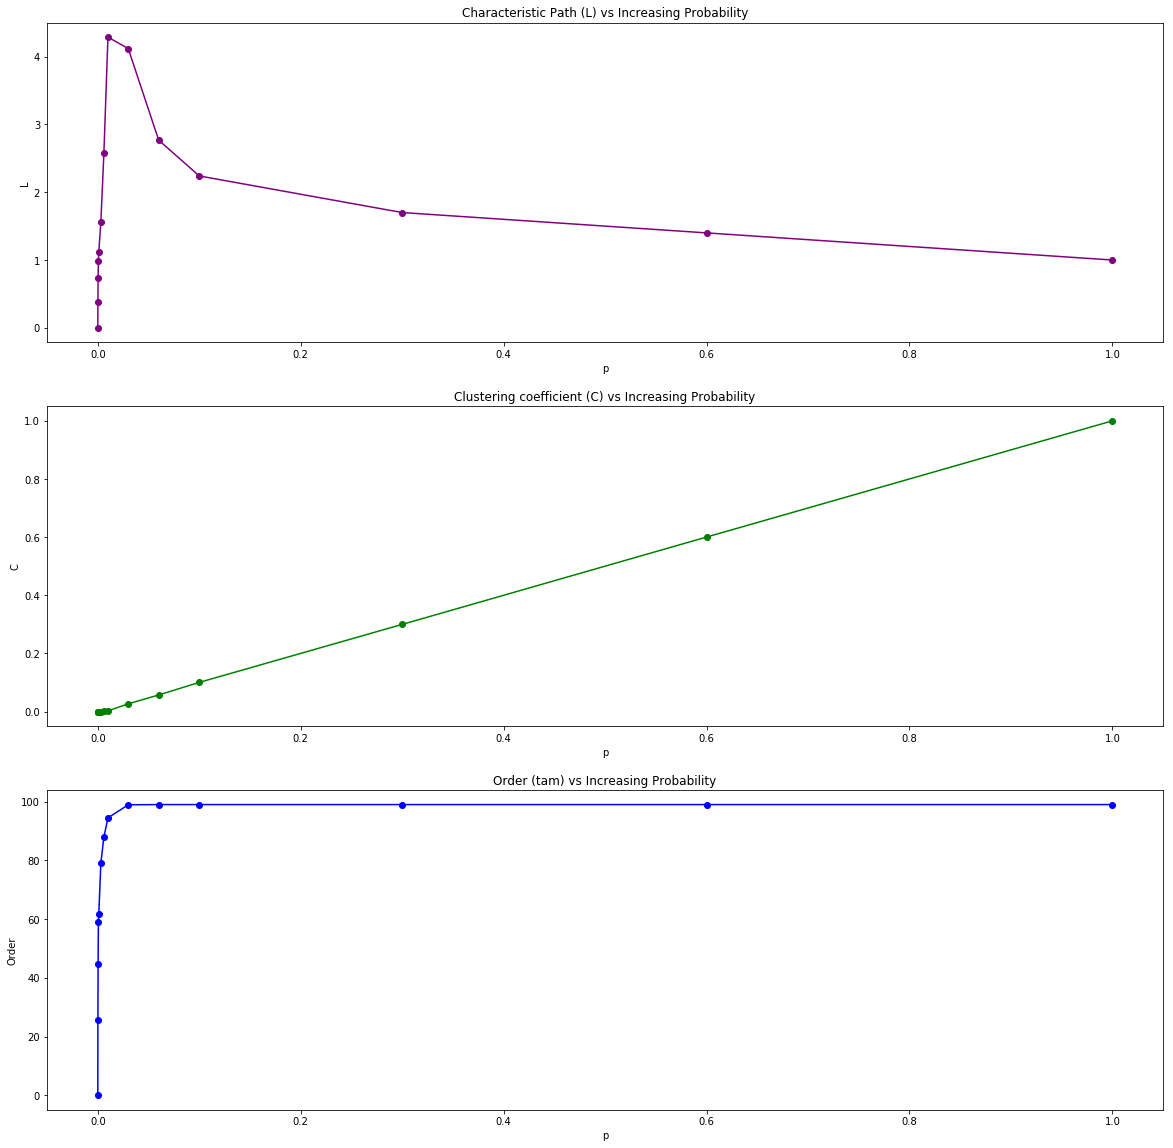

In [4]:
n = 100
n_graph = 80
prob = [ 0, 0.0001, 0.0003, 0.0006, 0.001, 0.003, 0.006, 0.01, 0.03, 0.06, 0.1, 0.3, 0.6, 1]
L_av = []
C_av = []
tam_av = []

for p in prob:
    results = L_C_Random(n_graph, n, p)
    L_av.append(list(results)[0])
    C_av.append(list(results)[1])
    tam_av.append(list(results)[2])

#Printing the L,C,tam vs probability    
f, (ax1, ax2, ax3) = plt.subplots(3)

ax1.plot(prob, L_av, '-o', color = 'purple')
ax1.set_xlabel('p')
ax1.set_ylabel('L')
ax1.set_title('Characteristic Path (L) vs Increasing Probability')

ax2.plot(prob, C_av, '-o', color = 'green')
ax2.set_xlabel('p')
ax2.set_ylabel('C')
ax2.set_title('Clustering coefficient (C) vs Increasing Probability')

ax3.plot(prob, tam_av, '-o', color= 'blue')
ax3.set_xlabel('p')
ax3.set_ylabel('Order')
ax3.set_title('Order (tam) vs Increasing Probability')

f.set_figheight(20)
f.set_figwidth(20)

<h4>For what probabilities p he produce changes phase in the behavior the parameters L, C and order of the largest connected component?</h4>

L - At probability = 0.01, we see a change in the graph where L is the largest value of 4.2.

C - At probability = 1, all nodes are connected and this gives the largest clustering coefficient of 1.0.

Order - The order starts to change at probability = 0.0001 and reaches the maxium at probability = 0.03 with a value of 99.0


<H3>Regular networks and small world </H3>

<H3>Section 2: Regular networks and small world</H3>

<H4> a. Implement a Python routine that generates a directed and weighted onedimensional mesh (each branch must take a random value according to a normal (0,1) of n nodes, where each node is connected to its k neighbours left (k/2) and right (k/2)</H4>

The format of the routine should be:
G = mesh_1d_directed_weighted (n, k)

In [5]:
def mesh_1d_directed_weighted(n, k):
    
    G=nx.newman_watts_strogatz_graph(n, k, 0, seed=None)
    G.to_directed()
    for (u,v,w) in G.edges(data=True):
        w['weight'] = random.randint(0,1)
        
    return G

In [6]:
def characteristic_path(G):
    #if the graph is connected, calculate the shortest path
    try:
        path = nx.average_shortest_path_length(G)
                    
    #if graph is disconnected, path is length of largest subgraph
    except:
        path_sub = nx.connected_component_subgraphs(G)
        subgraph = []
        for component in path_sub:
            L_sub = nx.average_shortest_path_length(component)
            subgraph.append(L_sub)
        path = max(subgraph)
    
    return (path)

<h4>Calculate the clustering index C and the characteristic path L for a mesh of n = 800 nodes and k = 8 neighbours</h4>

* Approach 1: Using the newman_watts_strogatz_graph with probability 1 to make a random graph:

In [7]:
print("*1D mesh directed and weighted: ")
print("Clustering index = ", nx.average_clustering(mesh_1d_directed_weighted(800, 8)))
print("Characteristic path L = ", characteristic_path(mesh_1d_directed_weighted(800, 8)) )

print("\n*Equivalent random graph not directed or weighted:")
print("Clustering index = ", nx.average_clustering(nx.newman_watts_strogatz_graph(800, 8, 1, seed=None)))
print("Characteristic path L = ", characteristic_path(nx.newman_watts_strogatz_graph(800, 8, 1, seed=None)))

*1D mesh directed and weighted: 
Clustering index =  0.6428571428571535
Characteristic path L =  50.43804755944931

*Equivalent random graph not directed or weighted:
Clustering index =  0.1682719647044676
Characteristic path L =  2.779220901126408


* Approach 2: Using the gnm_random_graph with 800 nodes and the same number of edges as in the mesh graph

In [8]:
print("*1D mesh directed and weighted: ")
print("Clustering index = ", nx.average_clustering(mesh_1d_directed_weighted(800, 8)))
print("Characteristic path L = ", characteristic_path(mesh_1d_directed_weighted(800, 8)) )

print("\n*Equivalent random graph not directed or weighted:")
print("Clustering index = ", nx.average_clustering(nx.gnm_random_graph(800, len(mesh_1d_directed_weighted(800, 8).edges()),
                                                                       seed = None)))
print("Characteristic path L = ", characteristic_path(nx.gnm_random_graph(800, len(mesh_1d_directed_weighted(800, 8).edges()),
                                                                          seed = None)))

*1D mesh directed and weighted: 
Clustering index =  0.6428571428571535
Characteristic path L =  50.43804755944931

*Equivalent random graph not directed or weighted:
Clustering index =  0.00959470284402559
Characteristic path L =  3.4455820402069004


<H4>Is the clustering index and the characteristic path comparable to that of a random graph not directed or weighted equivalent?</h4>

* Both approaches return similar results foor the clustering index and the characteristic path of the random graphs.

* Both, the Clustering index and the characteristic path are higher for the 1D mesh directed and weighted than for the equivalent random not directed or weighted graph. This make sense because the clustering index is a measure of the interconection of a node with its neighbors; while in the mesh all the nodes are forced to have 8 neighbors, in the random graph each node has different number of neighbors, and as result a lower clustering index. This same explanation is valid for the characteristic path in which the probability of having a largest group of interconected nodes is higher than in a random graph.

<H4> b. Using the NetworkX function watts_strogatz_ graph ( n,k,p) implement a Python routine L_C_small_world ( n_graph , n, k, p ) that returns the average value of the coefficients C ( average clustering index ) and L (characteristic path) for a set of n_graph Small World graphs</h4>

The format of the function must be [ l, c ] = L_C_ Small_World ( n_graph, n , k , p )

In [3]:
def L_C_Small_World(n_graph, n, k, p):
    
    C_small = []
    L_small = []
    tam_small = []
    
    #Make Small World graphs
    for i in range(n_graph):
        small = nx.watts_strogatz_graph(n, k, p, seed=None)

        #Clustering coefficient
        clus_small = nx.average_clustering(small)
        C_small.append(clus_small)

        #characteristic path
        #if the graph is connected, calculate the shortest path
        try:
            path_small = nx.average_shortest_path_length(small)
            L_small.append(path_small)
            
        #if graph is disconnected, path is length of largest subgraph
        except:
            path_small = nx.connected_component_subgraphs(small)
            subgraph_small = []
            for component in path_small:
                L_sub_small = nx.average_shortest_path_length(component)
                subgraph_small.append(L_sub_small)
            L_small.append(max(subgraph_small))
        
        #order
        order_small = max(nx.connected_components(small), key=len)
        tam_small.append(max(order_small))
        
    #[L, C]
    return(sum(L_small)/len(L_small), sum(C_small)/len(C_small), sum(tam_small)/len(tam_small))

<h4>c. Using the above routine, generate a graph with the behaviour of C and L for different values of probability p and a fixed number of nodes and branches. </h4>

Take N = 800, k = 8 and the following p values:
[ 0.0, 0.0001, 0.0003, 0.0006, 0.001, 0.003, 0.006, 0.01, 0.03, 0.06, 0.1, 0.3, 0.6, 1]

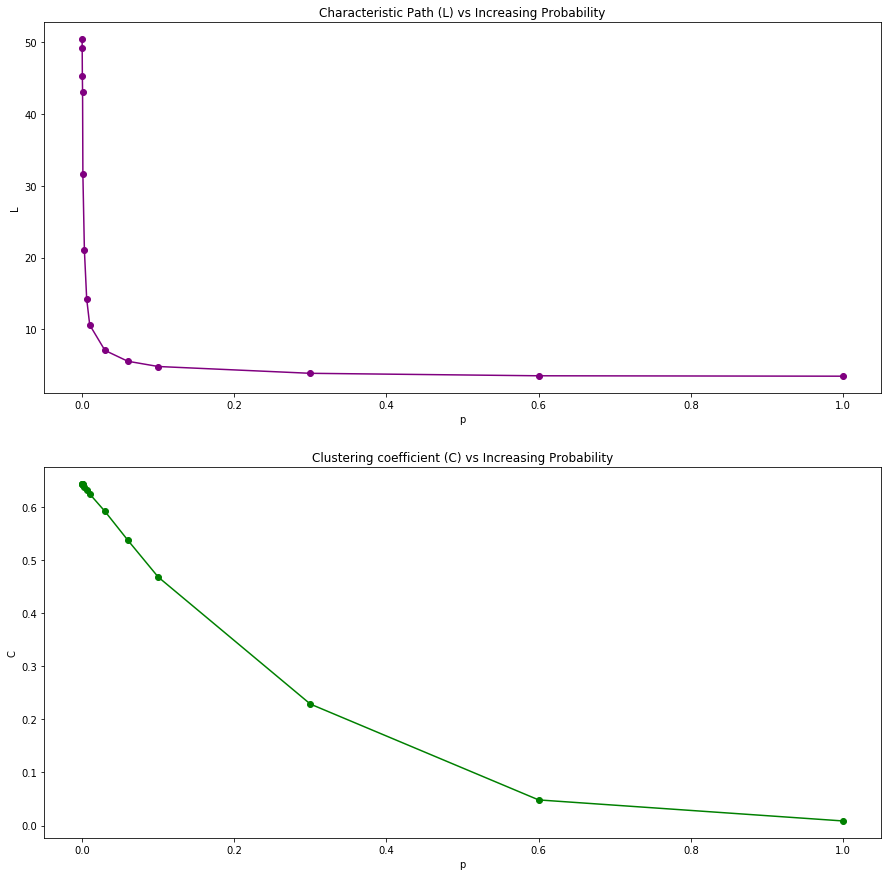

In [4]:
n_graph = 10
n = 800
k = 8
prob = [ 0, 0.0001, 0.0003, 0.0006, 0.001, 0.003, 0.006, 0.01, 0.03, 0.06, 0.1, 0.3, 0.6, 1]
L_sm = []
C_sm = []


for p in prob:
    results = L_C_Small_World(n_graph, n, k, p)
    L_sm.append(results[0])
    C_sm.append(results[1])
   

#Printing the L,C vs probability    
f, (ax1, ax2) = plt.subplots(2)

ax1.plot(prob, L_sm, '-o', color = 'purple')
ax1.set_xlabel('p')
ax1.set_ylabel('L')
ax1.set_title('Characteristic Path (L) vs Increasing Probability')

ax2.plot(prob, C_sm, '-o', color = 'green')
ax2.set_xlabel('p')
ax2.set_ylabel('C')
ax2.set_title('Clustering coefficient (C) vs Increasing Probability')

f.set_figheight(15)
f.set_figwidth(15)

<h4>For what probabilities p phase changes occur in behavior parameters L and C?</h4>

L - After probability = 0.003, we see a change in the graph where the characteristic path lenght starts to decrese. (This is also the closest value to the theoric p at which L starts decreasing (0.0016, as calculated on the cells below).

C - After probability = 0.006, we see a change in the graph where the clustering coefficient starts to decrese.

<h4>Between what values of p you would say that there is the Small World zone for these values of N and k. Does the p value observed correspond to the theoretical p value forthe phase change in the behaviour of the characteristic path?</h4>

Since the theory says tha small world graphs have a low characteristic path values and high clustering index, we can say that the small world zone would be between p= 0.003 (when the charachteristic path starts to decrese) and until p=0.6 (when the clustering index begins to approach zero).

<h4>Compare the graphs obtained from C and L with the corresponding theoretical graphs.</h4>

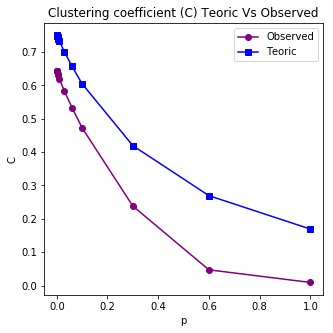

In [11]:
prob = [ 0, 0.0001, 0.0003, 0.0006, 0.001, 0.003, 0.006, 0.01, 0.03, 0.06, 0.1, 0.3, 0.6, 1]
k=8 
Clus_teo = []
for p in prob:
    c = (3*k*(k - 1))/((2*k*(2*(k-1))+(8*p*k*k)+(4*p*p*k*k)))
    Clus_teo.append(c)

f, (ax1) = plt.subplots(1)
ax1.plot(prob, C_sm, '-o', color = 'purple', label = 'Observed')
ax1.plot(prob, Clus_teo, '-s', color = 'blue', label = 'Teoric')
ax1.set_xlabel('p')
ax1.set_ylabel('C')
ax1.set_title('Clustering coefficient (C) Teoric Vs Observed')
ax1.legend()

f.set_figheight(5)
f.set_figwidth(5)

Although both of the graphics seem to be correlated and show similar behaviour, the clustering coefficients predicted theoretically are higher than the observed ones for all the range of probabilities, which means that the number of clusters formed is less than expected.

In [12]:
k=8
N= 800

p_L = 1/(k*N)

print("Teoric p at which L starts decreasing = ", p_L)

Teoric p at which L starts decreasing =  0.00015625


The theoric p at which the characteristic path length for a small world graph should start decreasing is 0.00015625. For the observed data, this decrement starts at p "0.0003", which is very similar to what was expected. 

<h4>With the data you obtained in exercise 1. Would you say that the protein interaction network of Caernobidis Elegans could be considered a small world network (Reason the answer)?</h4>

From the previous assignment, the Caernobidis Elegants graph showed the following parameters:

Clustering coefficient: 0.07570841434149081

Characteristing path lenght: 7.922564808498197

According to this parameters the Caernobidis Elegants interaction network doesnt't seem to be a small world network. Small World networks are characterized by low characteristic path values and high clustering index, however both the clustering coefficient and the charachteristic path for the CE network are small, which is more similar to what is expected for the random graphs.